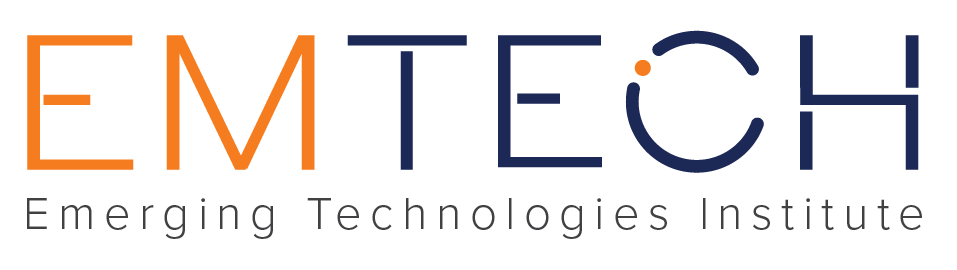

---
# **PROYECTO 2. INTRODUCCIÓN AL ANÁLISIS DE DATOS**

# **ALEJANDRO BERNAL  NAJERA**

---




# **Introducción**

En esta segunda parte del curso se tocarón temas sobre la manipulacion de listas, tuplas y diccionarios algo que no se habia visto en la parte anterior, tambien funciones que es de las maneras mas comunes de optimizar codigo y son muy utiles para no repetir cierta funcionalidad, por ultimo se vio algunas funciones que se podian hacer con las librerias para abrir archivos de texto y csv.

Al final para poner en práctica se propusó el ejercicio donde Synergy Logistics que es una empresa dedicada a la intermediación de servicios de 
importación y exportación de diferentes productos la cual tiene una base de datos con diferentes columnas de las rutas que toman ciertos productos, para eso se necesita hacer un analisis para dar una mejor estrategia operativa.

---

# **Código**

La Dirección de Synergy Logistics ha solicitado al equipo operativo, realizar una propuesta que permita enfocar las prioridades de la estrategia operativa 2021; para ello, se plantea analizar la viabilidad de 3 opciones de enfoque: rutas de importación y exportación, medio de transporte utilizado y valor total de importaciones y exportaciones. Considerando que eres el data analyst del equipo, se te solicita que realices un análisis de los siguientes puntos e identifiques cuál(es) de ellos es la mejor opción para la empresa:

### **Opción 1)** 
**Rutas de importación y exportación.** Synergy logistics está 
considerando la posibilidad de enfocar sus esfuerzos en las 10 rutas más 
demandadas. Acorde a los flujos de importación y exportación, ¿cuáles son esas 
10 rutas? ¿le conviene implementar esa estrategia? ¿porqué?

In [210]:
#importar pandas para la funcion read_csv lea el nombre del archivo y tome la columna register_id como la columna de indices
import pandas as pd
database = pd.read_csv("synergy_logistics_database.csv", index_col='register_id')
database.head()

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000


In [211]:
routesDict={}
#database[atributo] toma toda columna del dataframe y por cada registro se pasa de uno por uno con la funcion zip a las variables del for
for origin, destination, direction,transport in zip(database['origin'],database['destination'],database['direction'],database['transport_mode']):
  #Dado que cada ruta(origen y destino) se diferencia por la direccion y el modo de transporte 
  #las llaves del diccionario se guarda el origen, destino, direccion y modo de transporte y para cada una ir sumando 1 cada vez que se repita
  if (origin, destination, direction, transport) in routesDict:
    routesDict[origin, destination, direction, transport] += 1
  else:
    routesDict[origin, destination, direction, transport] = 1

In [212]:
#el diccionario creado lo volvemos una lista para mejor manejo con los proximos pasos
routesList = [ [key,routesDict[key]] for key in routesDict.keys() ]

In [213]:
# se itera con la nueva lista para guardarlos en otra lista que traiga solo los datos que sean de importaciones o solo los datos de exportaciones
# el orden de los valores es: origen, destino, modo de transporte y el total de veces usadas
ImpRoutes = [ [x[0][0], x[0][1], x[0][3], x[1]] for x in routesList if x[0][2] == 'Imports']
ExpRoutes = [ [x[0][0], x[0][1], x[0][3], x[1]] for x in routesList if x[0][2] == 'Exports']

In [214]:
#Ordenar de menor a mayor las listas dato el numero de veces que se usó la ruta
ImpRoutes.sort(key=lambda x: x[3], reverse=True)
ExpRoutes.sort(key=lambda x: x[3], reverse=True)

In [215]:
#Usando la libreria de pandas, la lista que tenemos la convertimos a un dataframe para visualizar la tabla mejor
bestExpRoutes = pd.DataFrame(ExpRoutes, columns=['Origen','Destino','Modo de Transporte','#Veces usada'])
print("10 RUTAS MAS DEMANDADAS EXPORTACION")
#con el head 10 se muestran solo los 10 mejores ya que estan ordenados
bestExpRoutes.head(10)

10 RUTAS MAS DEMANDADAS EXPORTACION


,Origen,Destino,Modo de Transporte,#Veces usada
0,South Korea,Vietnam,Sea,497
1,USA,Netherlands,Sea,436
2,Netherlands,Belgium,Road,374
3,China,Mexico,Air,330
4,Japan,Brazil,Sea,306
5,Germany,France,Road,299
6,South Korea,Japan,Sea,279
7,Australia,Singapore,Sea,273
8,Canada,Mexico,Rail,261
9,China,Spain,Air,250


In [216]:
#Usando la libreria de pandas, la lista que tenemos la convertimos a un dataframe para visualizar la tabla mejor
bestImpRoutes = pd.DataFrame(ImpRoutes, columns=['Origen','Destino','Modo de Transporte','#Veces usada'])
print("10 RUTAS MAS DEMANDADAS IMPORTACION")
#con el head 10 se muestran solo los 10 mejores ya que estan ordenados
bestImpRoutes.head(10)

10 RUTAS MAS DEMANDADAS IMPORTACION


,Origen,Destino,Modo de Transporte,#Veces usada
0,Singapore,Thailand,Sea,273
1,Germany,China,Sea,233
2,China,Japan,Air,210
3,Japan,Mexico,Sea,206
4,Malaysia,Thailand,Rail,195
5,China,Thailand,Road,145
6,Spain,Germany,Road,142
7,China,United Arab Emirates,Sea,114
8,Brazil,China,Sea,113
9,USA,Thailand,Sea,109


#### **¿Cuáles son esas 10 rutas?**

R. Para las mejores rutas en exportaciones la tabla BestExpRoutes, Para las mejores rutas en importaciones la tabla BestImpRoutes


#### **¿Le conviene implementar esa estrategia? ¿porqué?**

R. A mi parecer si porque si son las mas usadas quiere decir que son las que tienen mejor ganancia.

### **Opción 2)**
**Medio de transporte utilizado.** ¿Cuáles son los 3 medios de transporte 
más importantes para Synergy logistics considerando el valor de las 
importaciones y exportaciones? ¿Cuál es medio de transporte que podrían 
reducir? 

In [217]:
transportsDict = {}
#database[atributo] toma toda columna del dataframe y por cada registro se pasa de uno por uno con la funcion zip a las variables del for
for transport, direction, total in zip(database['transport_mode'],database['direction'], database['total_value']):
  #El modo de transporte se toma como la llave de diccionario mientras en cada uno se suma el total_value para ver cual es la que genera mas
  #aqui se suman los valores ya sean importaciones o exportaciones
  if (transport, direction) in transportsDict:
    transportsDict[transport, direction] += total
  else:
    transportsDict[transport, direction] = total

In [218]:
#se crea una lista dado los datos del diccionario, obteniendo la llave y el valor
transportList = [ [key,transportsDict[key]] for key in transportsDict.keys() ]

In [219]:
# se itera con la nueva lista para guardarlos en otra lista que traiga solo los datos que sean de importaciones o solo los datos de exportaciones
# el orden de los valores es: transporte y la sumatoria del total_value
ImpTransport = [ [x[0][0], x[1]] for x in transportList if x[0][1] == 'Imports']
ExpTransport = [ [x[0][0], x[1]] for x in transportList if x[0][1] == 'Exports']

In [220]:
#Ordenar de menor a mayor las listas dado el total que genero cada modo de transporte
ImpTransport.sort(key=lambda x: x[1],reverse=True)
ExpTransport.sort(key=lambda x: x[1],reverse=True)

MEDIOS DE TRANSPORTE MAS PARA EXPORTACIONES


,Modo de Transporte,Total
0,Sea,65592622000
1,Rail,34505043000
2,Air,32785147000
3,Road,27280486000


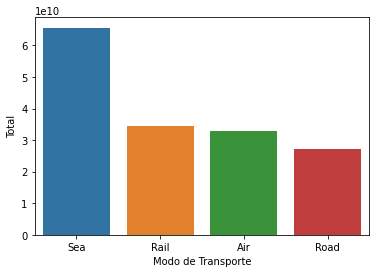

In [221]:
#Usando la libreria de pandas, la lista que tenemos la convertimos a un dataframe para visualizar la tabla mejor
bestExpTransports = pd.DataFrame(ExpTransport, columns=['Modo de Transporte', 'Total'])
print("MEDIOS DE TRANSPORTE MAS PARA EXPORTACIONES")
#con el head 3 se muestran solo los 3 modos de transporte mejores
import seaborn as sns
sns.barplot(x='Modo de Transporte', y='Total', data=bestExpTransports)
bestExpTransports

MEDIOS DE TRANSPORTE PARA IMPORTACIONES


,Modo de Transporte,Total
0,Sea,34938000000
1,Rail,9123000000
2,Road,5990000000
3,Air,5477000000


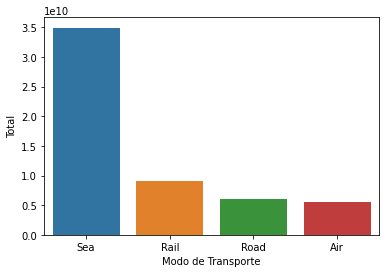

In [222]:
#Usando la libreria de pandas, la lista que tenemos la convertimos a un dataframe para visualizar la tabla mejor
bestImpTransports = pd.DataFrame(ImpTransport, columns=['Modo de Transporte', 'Total'])
print("MEDIOS DE TRANSPORTE PARA IMPORTACIONES")
#con el head 3 se muestran solo los 3 modos de transporte mejores
import seaborn as sns
sns.barplot(x='Modo de Transporte', y='Total', data=bestImpTransports)
bestImpTransports

#### **¿Cuáles son los 3 medios de transporte más importantes para Synergy logistics considerando el valor de las importaciones y exportaciones?**

R. como se muestra en las tablas anteriores, para exportacion es: son Mar, Riel y Aire los que generan mas y para las importaciones son: Mar, Riel y carretera.

#### **¿Cuál es medio de transporte que podrían reducir?**

R. Para las exportaciones el que genera menos ganancias es por carretera pero para las importaciones el que genera menos es por aire.

### **Opción 3)**
**Valor total de importaciones y exportaciones.** Si Synergy Logistics 
quisiera enfocarse en los países que le generan el 80% del valor de las 
exportaciones e importaciones ¿en qué grupo de países debería enfocar sus 
esfuerzos?

In [223]:
countryDict = {}
#database[atributo] toma toda columna del dataframe y por cada registro se pasa de uno por uno con la funcion zip a las variables del for
for origin, direction, total in zip(database['origin'], database['direction'], database['total_value']):
  #el pais de origen se toma como la llave de diccionario mientras en cada uno se suma el total_value para ver cual es la que genera mas
  #aqui se suman los valores ya sean importaciones o exportaciones
  if (origin, direction) in countryDict:
    countryDict[origin, direction] += total
  else:
    countryDict[origin, direction] = total

In [224]:
#se crea una lista dado los datos del diccionario, obteniendo la llave y el valor
countryList = [ [key,countryDict[key]] for key in countryDict.keys() ]

In [225]:
# se itera con la nueva lista para guardarlos en otra lista que traiga solo los datos que sean de importaciones o solo los datos de exportaciones
# el orden de los valores es: origen y la sumatoria del total_value
ImpCountry = [ [x[0][0], x[1]] for x in countryList if x[0][1] == 'Imports']
ExpCountry = [ [x[0][0], x[1]] for x in countryList if x[0][1] == 'Exports']

In [226]:
#Ordenar de menor a mayor las listas dado el total que genero cada pais
ImpCountry.sort(key=lambda x: x[1],reverse=True)
ExpCountry.sort(key=lambda x: x[1],reverse=True)

In [227]:
def bestCountries(countryList):
  #de la suma de los totales de todos los paises obtenemos cuanto es el 80%
  #obtenemos la lista de solo los totales, hacemos la sumatoria y multiplicamos *.8
  hundredPercent = sum([x[1] for x in countryList])
  eightyPercent = hundredPercent * .8
  totals = 0
  country80Percent = []
  #en la variable totales se va sumando el total de cada pais antes de ser puesto en la lista para verificar si no se pasa del 80%
  #si no sobrepasa el valor a el 80% del total, el pais entra al if y en la lista vacia de countryPorcentaje80 se va agregando 
  for country in countryList:
    totals += country[1]
    if totals <= eightyPercent:
      country80Percent.append([country[0],country[1],(country[1]*100/hundredPercent)])

  ##Usando la libreria de pandas, la lista que tenemos la convertimos a un dataframe para visualizar la tabla mejor
  bestCountries = pd.DataFrame(country80Percent, columns=['Pais(Origen)', 'Total','%'])
  print("Porcentaje: ", sum(bestCountries['%']))
  return bestCountries

In [228]:
print("PAISES (SOLO EXPORTACIONES) ORDENADOS DE FORMA DESCENDENTE QUE OCUPAN EL 80% DEL TOTAL DE LAS GANANCIAS")
#se muestran solo los paises que generan hasta el 80%(75.7%) del total de las ganancias (verificar en la grafica de arriba)
bestCountries(ExpCountry)

PAISES (SOLO EXPORTACIONES) ORDENADOS DE FORMA DESCENDENTE QUE OCUPAN EL 80% DEL TOTAL DE LAS GANANCIAS
Porcentaje:  75.59974133399776


,Pais(Origen),Total,%
0,China,32977046000,20.589640
1,France,18614332000,11.622096
2,USA,18355306000,11.460370
3,South Korea,14621146000,9.128899
4,Russia,13223000000,8.255949
5,Japan,11948976000,7.460496
6,Germany,11343233000,7.082292


In [229]:
print("PAISES (SOLO IMPORTACIONES) ORDENADOS DE FORMA DESCENDENTE QUE OCUPAN EL 80% DEL TOTAL DE LAS GANANCIAS")
#se muestran solo los paises que general hasta el 80% (76.3%) del total de las ganancias
bestCountries(ImpCountry)

PAISES (SOLO IMPORTACIONES) ORDENADOS DE FORMA DESCENDENTE QUE OCUPAN EL 80% DEL TOTAL DE LAS GANANCIAS
Porcentaje:  76.34886903904336


,Pais(Origen),Total,%
0,China,12233000000,22.030327
1,Japan,8094000000,14.576430
2,USA,5291000000,9.528526
3,Mexico,4621000000,8.321928
4,Germany,4250000000,7.653796
5,Singapore,4017000000,7.234188
6,South Korea,3889000000,7.003674


#### **¿En qué grupo de países debería enfocar sus esfuerzos?**

R. Dado los datos obtenidos de los totales por cada pais de origen los paises que se deberian enfocar mas sus esfuerzos estan en la tablas tablas de arriba divididas por exportacion e importaciones.

---

# **Opción sugerida como base de la estrategia de Synergy logistics**

Con la opcion 1 nos dimos cuenta cuales con las rutas que mas convienen usar para las exportaciones e importaciones, entonces al sacar este analisis me parece buena la estrategia de seguir usando mas estas rutas porque si se usan seguido podemos seguir teniendo un balance en las ganancias pero si ocupamos mejorar los ingresos el analisis estaria mejor hacerlos en base al valor total que es nuestra ultima columna del dataset.

En la opcion dos obtuvimos los medios de transporte que generan mas valor y a mi parecer esta estrategia esta bien usarla ya que estan basando su enfoque en el dinero y asi podria reducir los viajes de los que no estan generando tanto y si es posible cambiar ese medio de transporde por los que si generan mas.

Por ultimo para la opcion 3 los paises que se deben enfocar los esfuerzos, la estrategia de escoger los mayores que generen el 80% de todas las ganancias es buena estrategia pero yo la complementaria con que tambien se vea la cantidad de paises mas demandados, para ver si son mas demandados y tienen buen ingreso basarme mas en esos.

---

# **Conclusión**


Me pareció muy buena idea sacar un analisis asi, aunque se pueden obtener  demuchas maneras, este tipo de analisis son lo suficientemente buenas para poner aprueba los conocimientos de esta segunda parte del curso, aparte creo que este tipo de problemas o analisis siempre se pueden ocupar en una empresa para demostrar como van o ayudar para saber cuales estrategias tomar en ciertas situaciones para mejorar e rendimiento o reducir algunos riesgos.

Con el proyecto pienso que se cumplió muy bien los objetivos del curso y que nos ayudará mucho para un futuro ser un buen data scientist.

---